In [1]:
from optimizer import *
from plotting import * 

### Data loading

The dataset consists of **daily stock returns for 23 equities**, covering the period from **January 4, 2016 to December 28, 2017**.  
Price data are sourced from **Yahoo Finance** and transformed into daily returns.

In [2]:
stock_returns = pd.read_excel("../FERM_3_Assignment_1.xlsx", sheet_name="Daily_Returns_Q1_Q2")

In [3]:
stock_returns.head()

,date,IBM,GE,LLY,F,BAC,KR,ITUB,GG,SIRI,...,T,ECA,ABEV,CVS,MRVL,CSCO,MO,BMY,WFC,HBAN
0,2016-01-04,-0.000736,0.000976,0.014852,-0.018058,0.000000,0.022343,0.008006,-0.023029,-0.010178,...,0.006963,0.026925,0.013954,0.002899,-0.032335,-0.004554,0.020011,0.019501,-0.000378,0.001867
1,2016-01-05,-0.005018,-0.016069,-0.006321,-0.045479,-0.021533,-0.000951,-0.008006,0.018804,-0.005128,...,-0.015441,-0.062643,-0.011614,-0.012273,-0.056744,-0.010708,0.010534,-0.017713,-0.019281,-0.015985
2,2016-01-06,-0.017237,-0.043235,-0.026306,-0.031773,-0.036736,-0.023581,-0.031023,0.074229,-0.012937,...,-0.016280,-0.049700,-0.040530,-0.014546,0.009889,-0.023338,-0.017561,-0.028090,-0.028942,-0.030801
3,2016-01-07,-0.009301,-0.018113,-0.001967,-0.012678,-0.019545,-0.006596,0.000000,-0.018247,-0.007843,...,0.000895,0.037504,0.016888,-0.006605,0.011009,-0.025106,0.001719,-0.025754,-0.016807,-0.017752
4,2016-01-08,0.012082,0.004559,-0.012135,0.018175,0.007211,0.011696,-0.001660,-0.055982,0.002621,...,0.012150,-0.035384,-0.016888,0.014431,0.012092,0.019581,0.020731,-0.010268,0.010637,0.004963


## Estimation of expected returns and covariance

We estimate the **mean vector** and **covariance matrix** of the 23 stocks using daily returns over the sample period.

In [4]:
mean_return_matrix = stock_returns.drop(columns=["date"]).mean()
cov_matrix = stock_returns.drop(columns=["date"]).cov()

In [5]:
asset_names = stock_returns.drop(columns=["date"]).columns

## Return correlations

The correlation matrix of daily returns is plotted to assess cross-asset dependencies.

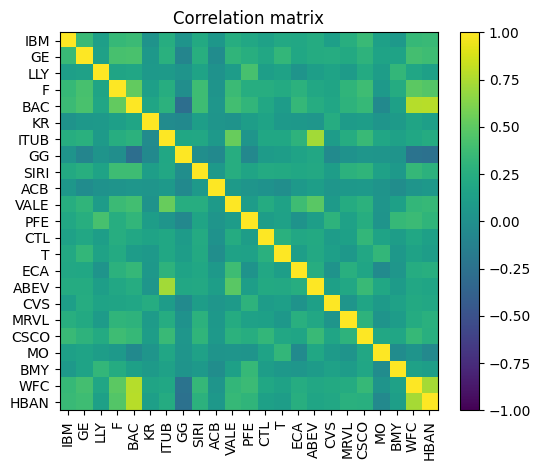

In [6]:
corr = np.corrcoef(stock_returns.drop(columns=["date"]), rowvar=False)
plot_correlation_matrix(corr, asset_names)

In [7]:
st_returns = stock_returns.drop(columns=["date"])

## Distribution of stock returns

We examine the empirical distributions of daily stock returns

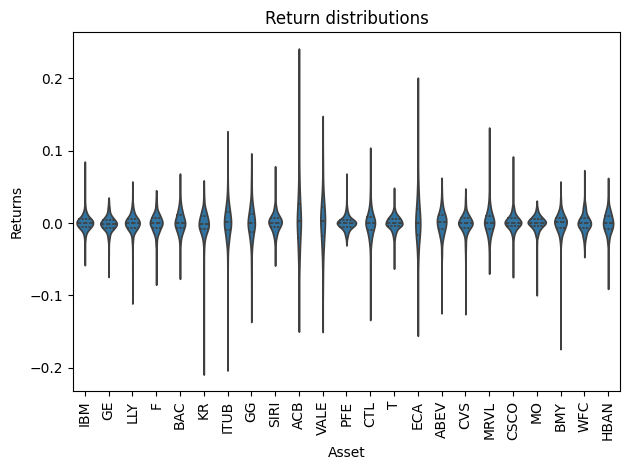

In [8]:
plot_return_violins(stock_returns.drop(columns=["date"]), asset_names)

## Perform mean-vatiance optimization with the following constraints:

## minimize $x^{T}Vx $ (1)
## s.t. $\mu^{T}x>=$0.0005 (2)
## $\sum_{i=0}^{n} x_i$ = 1 (3)

## Mean–variance portfolio optimization

We solve the following **mean–variance optimization problem**:

$
\min_{x} \; x^{\top} V x \tag{1}
$

subject to
$
\mu^{\top} x \ge 0.0005 \tag{2}
$

$
\sum_{i=1}^{n} x_i = 1 \tag{3}
$

where $x \in \mathbb{R}^n$ denotes the portfolio weights,  
$\mu$ is the vector of expected daily returns, and  
V is the return covariance matrix.


In [9]:
targeted_return1 = 0.0005

In [10]:
w_port1, var_port1, return_port1, result_port1 = mean_variance_opt(mean_return_matrix, cov_matrix, targeted_return1)
print("portfolio weights:", w_port1)
print("portfolio mean return : ", round(return_port1, 4)*100, "%")
print("vol:", round(np.sqrt(var_port1)*100, 4), "%")
print("variance:", round(var_port1, 6))

portfolio weights: [ 0.08917668 -0.0208372   0.02284051 -0.04303578  0.05731254  0.02201725
 -0.02518617  0.07055633  0.06539291  0.01996536 -0.02433193  0.1721223
 -0.03507993  0.14724748  0.00426806  0.02246318  0.03250857  0.03563451
  0.06099552  0.23302199  0.04377781  0.03257602  0.016594  ]
portfolio mean return :  0.05 %
vol: 0.5765 %
variance: 3.3e-05


## Modified target return constraint

We update the target return constraint to **0.08% per day**, replacing condition (2) with:

$
\mu^{\top} x \ge 0.0008 \tag{2′}
$

In [11]:
targeted_return2 = 0.0008

In [12]:
w_port2, var_port2, return_port2, result_port2 = mean_variance_opt(mean_return_matrix, cov_matrix, targeted_return2)
print("portfolio weights:", w_port2)
print("portfolio mean return : ", round(return_port2, 4)*100, "%")
print("vol:", round(np.sqrt(var_port2)*100, 4), "%")
print("variance:", round(var_port2, 6))

portfolio weights: [ 0.08487447 -0.09014136  0.01296829 -0.06506253  0.10457585  0.00951425
 -0.0209608   0.06928991  0.06755356  0.02874223 -0.0157054   0.19270345
 -0.05069327  0.17419936  0.00627226  0.01381521  0.02160798  0.05163818
  0.08246393  0.2562859   0.04432042  0.01454507  0.00719301]
portfolio mean return :  0.08 %
vol: 0.6151 %
variance: 3.8e-05


## Sharpe ratio optimization

We find the tangency (maximum Sharpe) portfolio by solving

$
\max_{x} \; \frac{(\mu - r_f \mathbf{1})^{\top} x}{\sqrt{x^{\top} V x}},
$

where $r_f$ denotes the risk-free rate.


In [13]:
rf = 0.00001 # risk-free rate

In [14]:
w_sharpe, var_sharpe, return_sharpe, result_sharpe = sharpe_ratio_optimization(mean_return_matrix, cov_matrix, rf, short_allowed=True)

In [15]:
vol_sharpe = np.sqrt(var_sharpe)*100

In [16]:
print("portfolio weights:", w_sharpe)
print("portfolio mean return : ", round(return_sharpe, 4)*100, "%")
print("vol:", round(vol_sharpe, 4), "%")
print("variance:", round(var_sharpe, 6))

portfolio weights: [-0.14552252 -3.96508304 -0.58639774 -1.30909854  2.74945578 -0.71799854
  0.19591199  0.0157397   0.20310567  0.52442402  0.46753742  1.2702412
 -0.90436085  1.70463939  0.10935665 -0.47238419 -0.57403305  0.98176911
  1.29478222  1.5943367   0.02599257 -0.97790606 -0.48450788]
portfolio mean return :  1.77 %
vol: 6.7684 %
variance: 0.004581


## Efficient frontier construction

We construct the **mean–variance efficient frontier** by solving the portfolio optimization problem for target returns ranging from **0.2% to 2%**.

In [17]:
front_returns = np.linspace(0.0002, 0.02, 100)

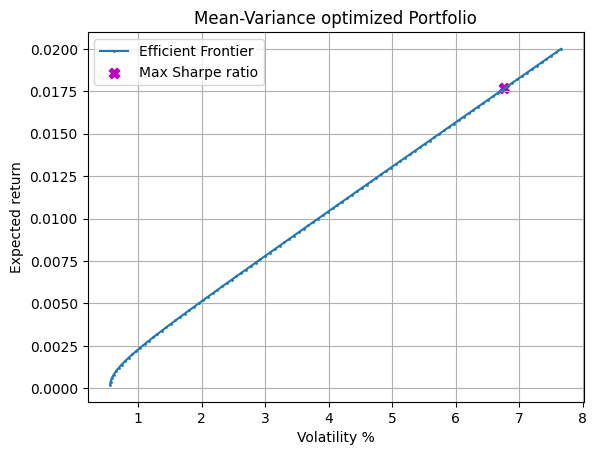

In [18]:
plot_efficient_frontier(front_returns, mean_return_matrix, cov_matrix, rf)

## Value at Risk (VaR) and Conditional Value at Risk (CVaR)

We compute the **Value at Risk (VaR)** and **Conditional Value at Risk (CVaR)** at the **90% confidence level** for an **equally weighted portfolio** of the 23 stocks.

In [19]:
conf_level = 0.9

In [20]:
mean_daily_ret_port = stock_returns.drop(columns=["date"]).mean(axis=1)

In [21]:
var90 = get_var(mean_daily_ret_port, conf_level)

In [22]:
cvar90 = get_cvar(mean_daily_ret_port, conf_level)

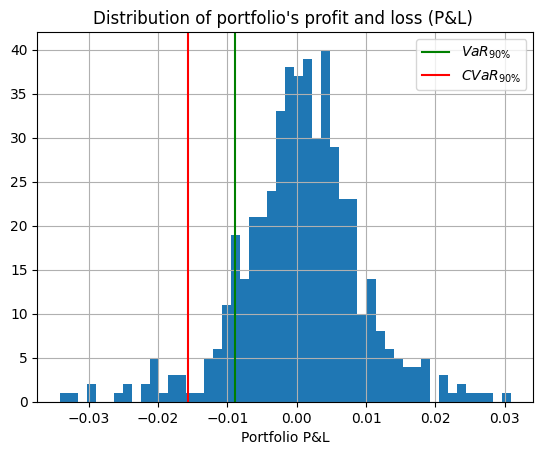

In [30]:
plot_var_cvar(mean_daily_ret_port, var90, cvar90, conf_level, 50)

## VaR and CVaR of the Sharpe-optimal portfolio

For the Sharpe-optimal (maximum Sharpe ratio) portfolio, we estimate the **VaR** and **CVaR** of portfolio losses at the **90% confidence level**.

In [24]:
sharpe_daily_ret_port = stock_returns.drop(columns=["date"]) @ w_sharpe

In [25]:
var90_sharpe = get_var(sharpe_daily_ret_port, conf_level)

In [26]:
cvar90_sharpe = get_cvar(sharpe_daily_ret_port, conf_level)

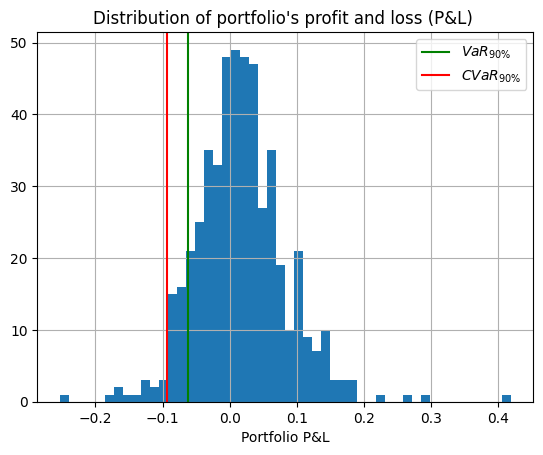

In [31]:
plot_var_cvar(sharpe_daily_ret_port, var90_sharpe, cvar90_sharpe, conf_level, 50)

## Comparison of mean returns

We compare the **mean returns** of the **Sharpe-optimal portfolio** and the **equally weighted portfolio** to assess whether Sharpe optimization leads to higher expected performance.

In [28]:
sharpe_daily_ret_port.mean() > mean_daily_ret_port.mean()

np.True_

## Interpretation of results

While the Sharpe-optimal portfolio achieves a higher mean return than the equally weighted benchmark, it exhibits larger VaR and CVaR at the same confidence level. This reflects the fact that Sharpe ratio maximization optimizes the mean–variance trade-off rather than tail risk. In particular, the optimization does not impose explicit constraints on downside risk or portfolio volatility, which can lead to worse tail outcomes despite improved risk-adjusted performance.